In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

from matplotlib import rcParams

In [4]:
ad = sc.read_h5ad("../data/non_tumor_snSeq.h5ad"); print(ad.shape)
obs = pd.read_csv("../data/non_tumor_epithelial_compartment.csv", index_col=0, header=0); print(obs.shape)
ad = ad[obs.index].copy(); print(ad.shape)
sc.pp.normalize_total(ad)
sc.pp.log1p(ad)
print(ad.shape)

(25102, 33538)
(12819, 5)
(12819, 33538)
(12819, 33538)


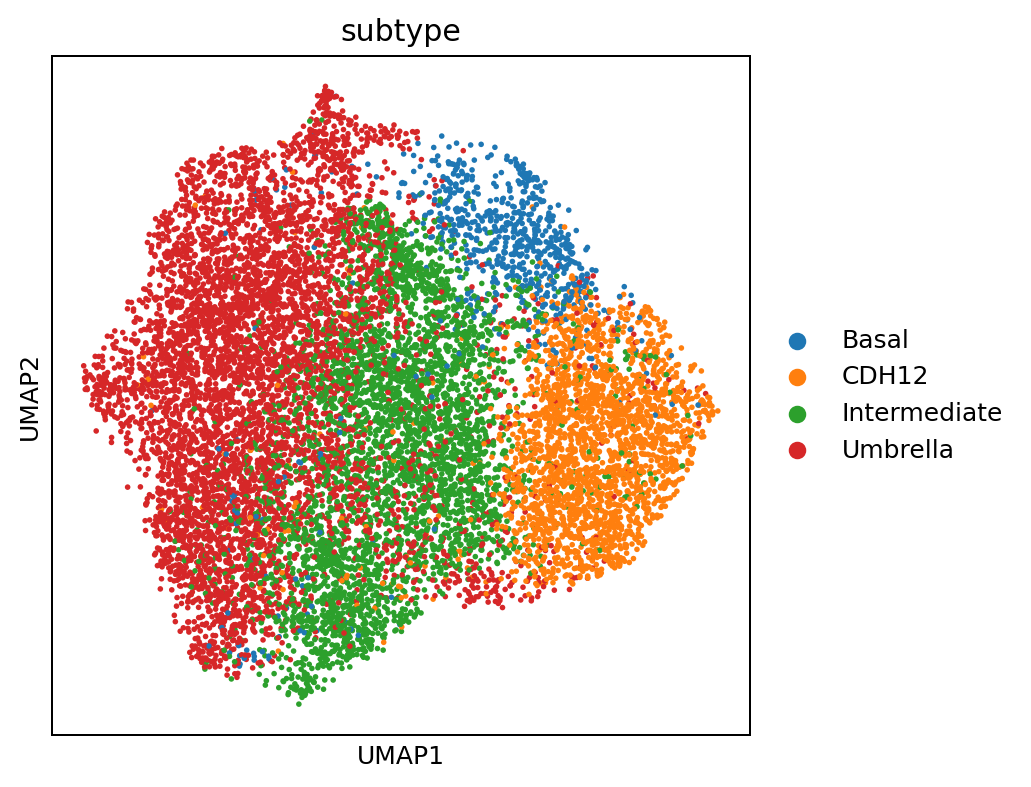

In [5]:
rcParams['figure.figsize'] = (5,5)
rcParams['figure.dpi'] = 180

ad.obs['subtype'] = pd.Categorical(obs.subtype.values)
ad.obsm['X_umap'] = obs.loc[:, ['umap_1', 'umap_2']].values.copy()
sc.pl.umap(ad, color='subtype', s=20)

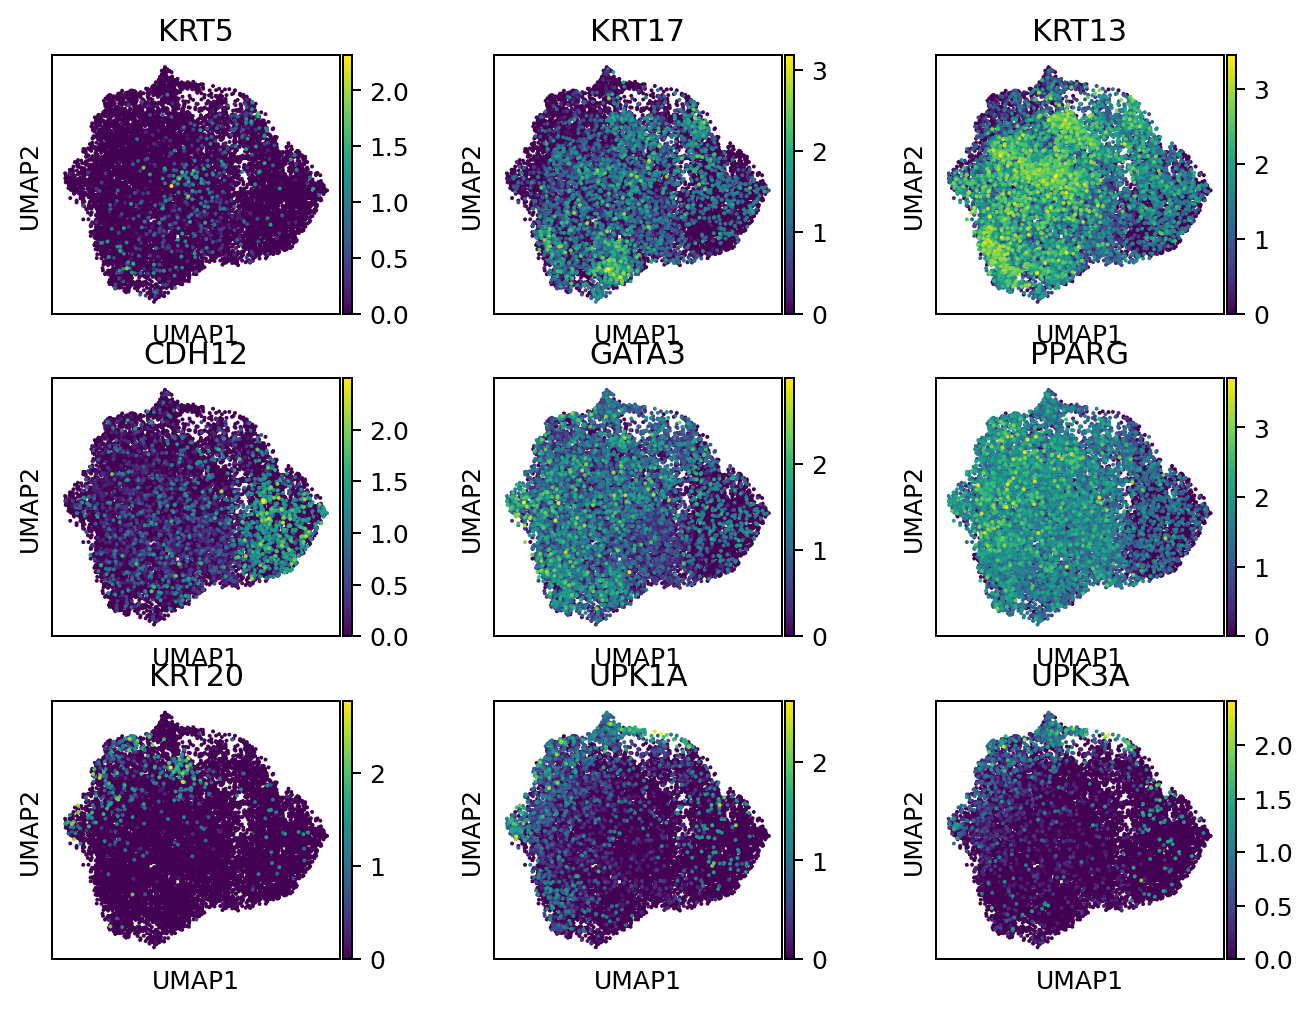

In [20]:
rcParams['figure.figsize'] = (2,2)
rcParams['figure.dpi'] = 180
sc.pl.umap(ad, 
           color=['KRT5', 'KRT17', 'KRT13', 
                  'CDH12', 'GATA3', 'PPARG', 
                  'KRT20', 'UPK1A', 'UPK3A'],
           s=10,
           ncols=3
          )